In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("occupancy_data/datatest.txt")

# Stats

In [7]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [8]:
df.median()

Temperature       20.890000
Humidity          25.000000
Light              0.000000
CO2              580.500000
HumidityRatio      0.003815
Occupancy          0.000000
dtype: float64

In [10]:
# class composition
count_0 = 0
count_1 = 1
for value in df['Occupancy']:
    if value == 0:
        count_0 += 1
    elif value == 1:
        count_1 += 1
    else:
        print("Ahem") #just checking for anomalous values
print("Class 0: " +  str(count_0))
print("Percentage of whole df: " + str(round(count_0/df.index.size*100, 2)) + "%")
print("Class 1: " + str(count_1))
print("Percentage of whole df: " + str(round(count_1/df.index.size*100, 2)) + "%")

Class 0: 1693
Percentage of whole df: 63.53%
Class 1: 973
Percentage of whole df: 36.51%


In [11]:
df.groupby('Occupancy').aggregate(['min',np.median, 'mean'])
  

Temperature                   Humidity                    Light  \
                  min median       mean      min median       mean    min   
Occupancy                                                                   
0               20.20  20.70  20.884211    22.10  24.20  24.226417    0.0   
1               20.29  22.68  22.391266    22.79  27.12  27.317816  217.2   

                                CO2                       HumidityRatio  \
          median        mean    min   median         mean           min   
Occupancy                                                                 
0            0.0   17.332543  427.5   479.25   547.613497      0.003303   
1          461.0  499.596132  441.6  1038.25  1014.517585      0.003349   

                               
             median      mean  
Occupancy                      
0          0.003661  0.003703  
1          0.004578  0.004591

In [4]:
# attribute statistics broken down according to class label

for attribute in df.columns:
    print("\n"+ str(attribute).upper())
    print(df.groupby('Occupancy')[attribute].describe())
    print("\n")


DATE
          count unique                  top freq
Occupancy                                       
0          1693   1693  2015-02-03 05:34:00    1
1           972    972  2015-02-03 17:02:00    1



TEMPERATURE
            count       mean       std    min     25%    50%   75%        max
Occupancy                                                                    
0          1693.0  20.884211  0.559707  20.20  20.575  20.70  21.0  23.290000
1           972.0  22.391266  0.953561  20.29  21.700  22.68  23.1  24.408333



HUMIDITY
            count       mean       std    min    25%    50%    75%      max
Occupancy                                                                  
0          1693.0  24.226417  1.797429  22.10  22.55  24.20  25.05  30.1225
1           972.0  27.317816  2.141203  22.79  25.50  27.12  28.50  31.4725



LIGHT
            count        mean         std    min    25%    50%    75%      max
Occupancy                                                          

<b> Pairwise correlations </b>

In [13]:
# correlation
df.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,0.716988,0.768428,0.870226,0.894548,0.705784
Humidity,0.716988,1.000000,0.561905,0.911611,0.951914,0.610764
Light,0.768428,0.561905,1.000000,0.769167,0.693286,0.927949
CO2,0.870226,0.911611,0.769167,1.000000,0.964440,0.768030
HumidityRatio,0.894548,0.951914,0.693286,0.964440,1.000000,0.700330
Occupancy,0.705784,0.610764,0.927949,0.768030,0.700330,1.000000


# Data visualisation

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

(array([109., 135., 158., 230., 330., 144., 252.,  91.,  75., 103.,  44.,
         25.,  39.,  36.,  43.,  20.,  43.,  23.,  35.,  56.,  33.,  32.,
         82.,  98.,  47.,  54.,  46.,  27.,  67.,  81.,  16.,   9.,  31.,
         20.,   3.,   4.,   3.,   8.,   9.,   4.]),
 array([20.2       , 20.30520833, 20.41041667, 20.515625  , 20.62083333,
        20.72604167, 20.83125   , 20.93645833, 21.04166667, 21.146875  ,
        21.25208333, 21.35729167, 21.4625    , 21.56770833, 21.67291667,
        21.778125  , 21.88333333, 21.98854167, 22.09375   , 22.19895833,
        22.30416667, 22.409375  , 22.51458333, 22.61979167, 22.725     ,
        22.83020833, 22.93541667, 23.040625  , 23.14583333, 23.25104167,
        23.35625   , 23.46145833, 23.56666667, 23.671875  , 23.77708333,
        23.88229167, 23.9875    , 24.09270833, 24.19791667, 24.303125  ,
        24.40833333]),
 <a list of 40 Patch objects>)

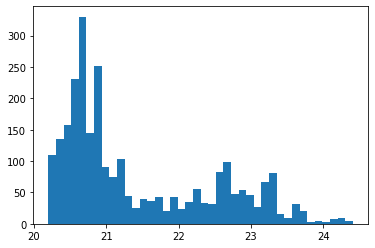

In [15]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['Temperature'], bins = 40)



(array([1.618e+03, 2.400e+01, 7.120e+02, 2.460e+02, 6.200e+01, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([   0.   ,  169.725,  339.45 ,  509.175,  678.9  ,  848.625,
        1018.35 , 1188.075, 1357.8  , 1527.525, 1697.25 ]),
 <a list of 10 Patch objects>)

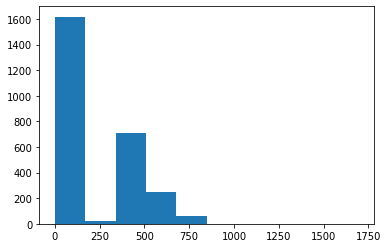

In [16]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['Light'])



(array([1105.,  331.,  176.,  152.,  151.,  174.,  198.,  181.,   64.,
         133.]),
 array([ 427.5  ,  524.975,  622.45 ,  719.925,  817.4  ,  914.875,
        1012.35 , 1109.825, 1207.3  , 1304.775, 1402.25 ]),
 <a list of 10 Patch objects>)

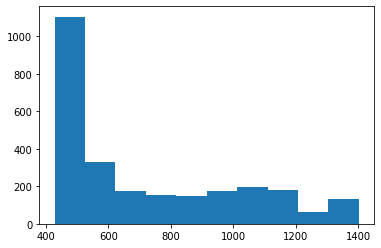

In [17]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['CO2'])



(array([645., 392., 472., 150., 194., 178., 218., 120., 122., 174.]),
 array([0.00330331, 0.00351076, 0.0037182 , 0.00392565, 0.00413309,
        0.00434054, 0.00454798, 0.00475543, 0.00496287, 0.00517031,
        0.00537776]),
 <a list of 10 Patch objects>)

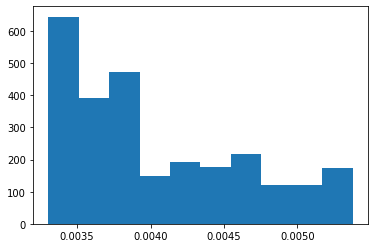

In [18]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['HumidityRatio'])



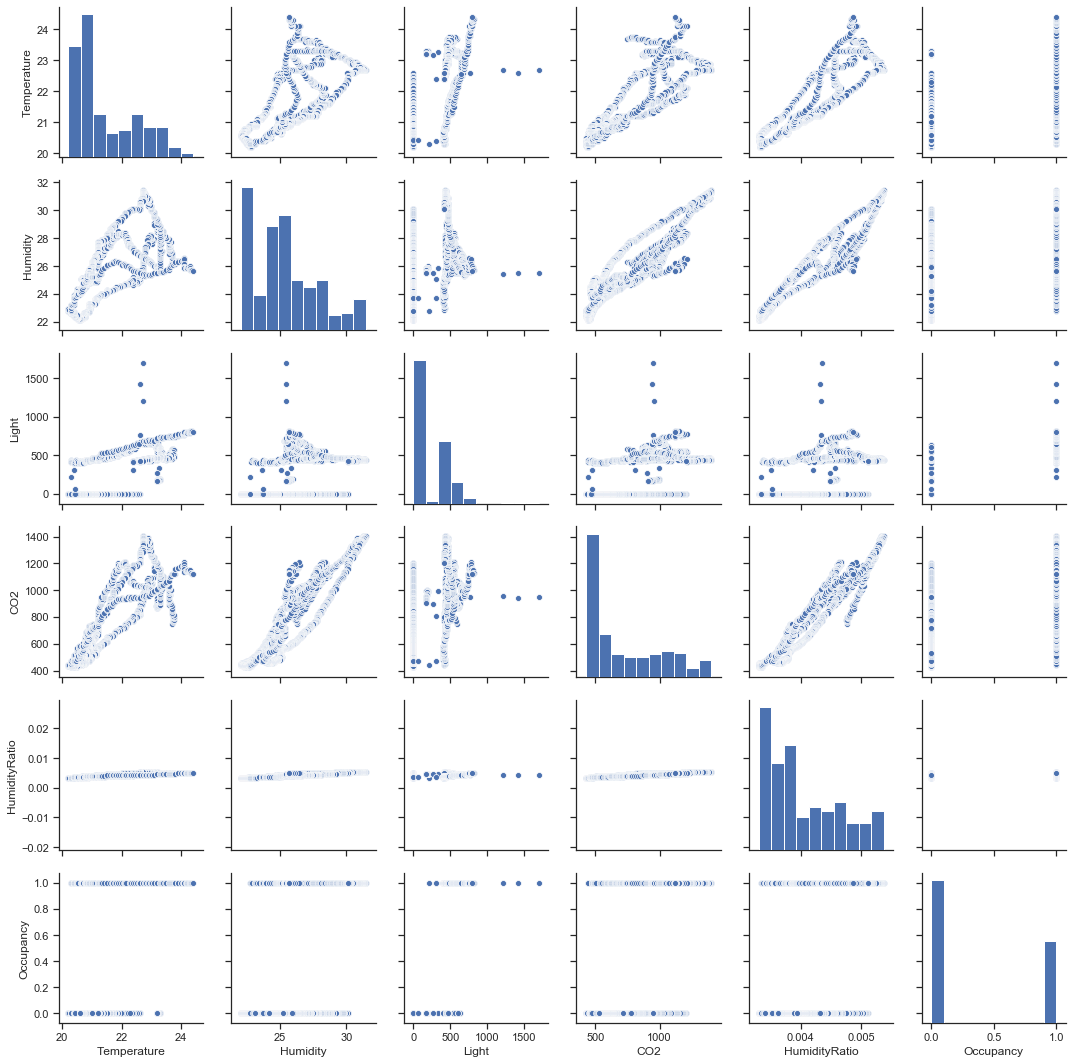

In [19]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df)



Text(0, 0.5, 'Count')

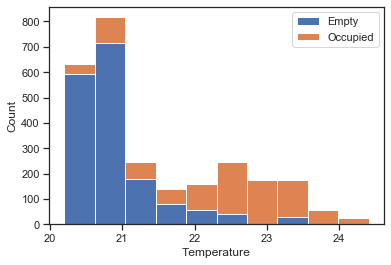

In [20]:
df1 = df[df['Occupancy'] == 0]['Temperature']
df2 = df[df['Occupancy'] == 1]['Temperature']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('Temperature')
ax.set_ylabel('Count')



Text(0, 0.5, 'Count')

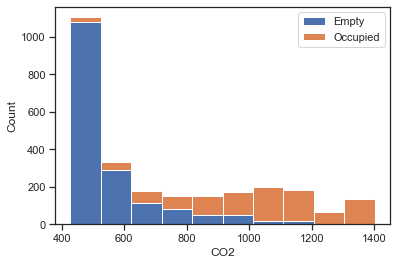

In [21]:
df1 = df[df['Occupancy'] == 0]['CO2']
df2 = df[df['Occupancy'] == 1]['CO2']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('CO2')
ax.set_ylabel('Count')



Text(0, 0.5, 'Count')

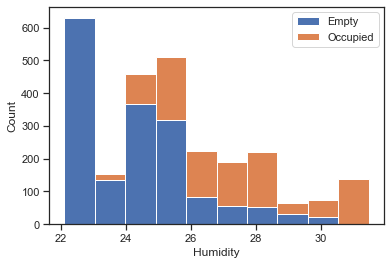

In [22]:
df1 = df[df['Occupancy'] == 0]['Humidity']
df2 = df[df['Occupancy'] == 1]['Humidity']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('Humidity')
ax.set_ylabel('Count')



Text(0, 0.5, 'Count')

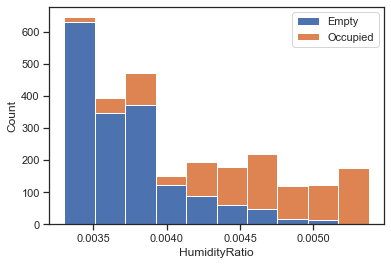

In [23]:
df1 = df[df['Occupancy'] == 0]['HumidityRatio']
df2 = df[df['Occupancy'] == 1]['HumidityRatio']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('HumidityRatio')
ax.set_ylabel('Count')



Text(0, 0.5, 'Count')

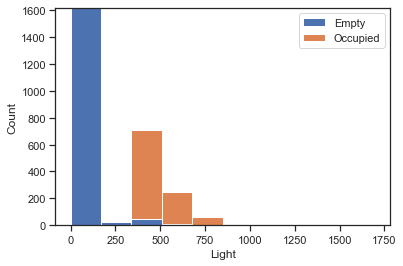

In [24]:
df1 = df[df['Occupancy'] == 0]['Light']
df2 = df[df['Occupancy'] == 1]['Light']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], bins = 10, stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('Light')
ax.set_ylabel('Count')

<b> Outliers </b>

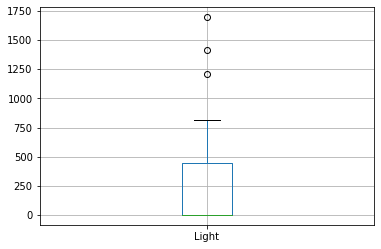

In [5]:
boxplot = df.boxplot(column= ['Light'])

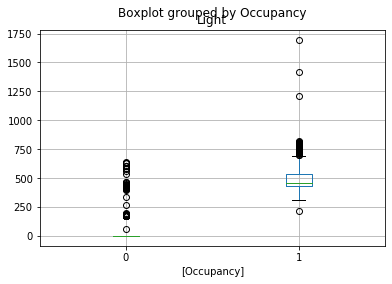

In [10]:
boxplot = df.boxplot(column= ['Light'], by = ['Occupancy'])

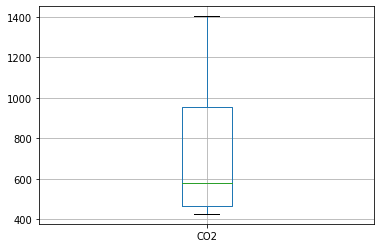

In [6]:
boxplot = df.boxplot(column= ['CO2'])

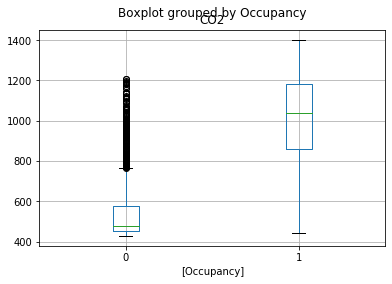

In [11]:
boxplot = df.boxplot(column= ['CO2'], by = ['Occupancy'])

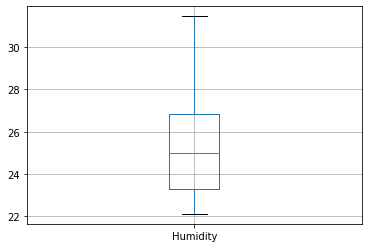

In [7]:
boxplot = df.boxplot(column= ['Humidity'])

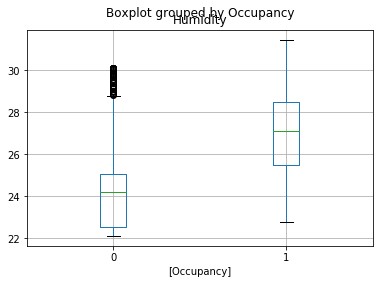

In [12]:
boxplot = df.boxplot(column= ['Humidity'], by = ['Occupancy'])

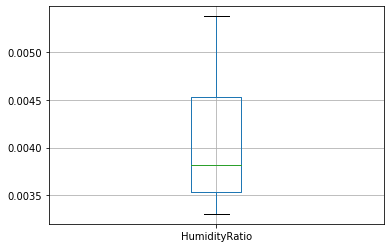

In [8]:
boxplot = df.boxplot(column= ['HumidityRatio'])


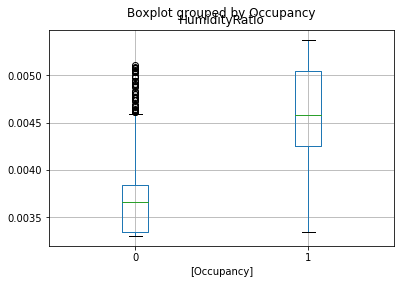

In [13]:
boxplot = df.boxplot(column= ['HumidityRatio'], by = ['Occupancy'])

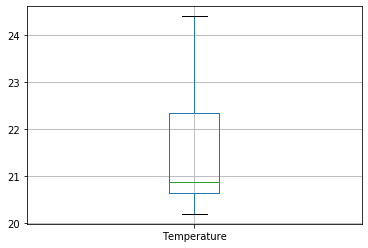

In [9]:
boxplot = df.boxplot(column= ['Temperature'])

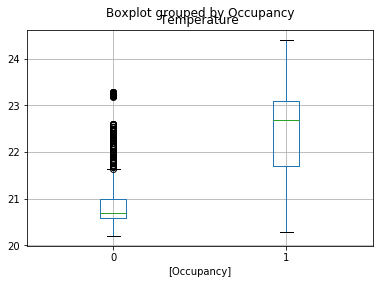

In [14]:
boxplot = df.boxplot(column= ['Temperature'], by = ['Occupancy'])